## **Part 1-  Data Preproccessing**

In [43]:
import pandas as pd
import numpy as np

file_path = 'players_football_ds.csv'
df = pd.read_csv(file_path)
df.head()

,Name,Age,Nationality,Overall,Club,Value(£)
0,L. Goretzka,27,Germany,87,FC Bayern München,91000000
1,Bruno Fernandes,27,Portugal,86,Manchester United,78500000
2,M. Acuña,30,Argentina,85,Sevilla FC,46500000
3,K. De Bruyne,31,Belgium,91,Manchester City,107500000
4,N. Barella,25,Italy,86,Inter,89500000


## **Step 1: Data Exploration**

+ **LOGIC**

In [44]:
# Describing the ds
print("\n--------- Describing the ds ---------")
print(df.describe())

# Discovering the ds
print("\n--------- Discovering the ds ---------")
print(df.info())

## Checking if there are any mssing values
print("\n--------- Messing values ---------")
print(df.isnull().sum())

# Check for duplicate rows
print("\n--------- Duplicating values or rows ---------")
print("Duplicate rows:", df.duplicated().sum())


--------- Describing the ds ---------
                Age       Overall      Value(£)
count  17660.000000  17660.000000  1.766000e+04
mean      23.127746     63.369592  2.739788e+06
std        4.639821      8.036268  7.841276e+06
min       15.000000     43.000000  0.000000e+00
25%       20.000000     58.000000  3.250000e+05
50%       22.000000     63.000000  7.000000e+05
75%       26.000000     69.000000  1.725000e+06
max       54.000000     91.000000  1.905000e+08

--------- Discovering the ds ---------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17660 entries, 0 to 17659
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         17660 non-null  object
 1   Age          17660 non-null  int64 
 2   Nationality  17660 non-null  object
 3   Overall      17660 non-null  int64 
 4   Club         17660 non-null  object
 5   Value(£)     17660 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 827.9+ KB
N

+ **INTERPRETATION**

## **Step 2: Data Cleaning and Handling Missing Values**

+ **LOGIC**

In [45]:
# Droping any duplicate rows if existe
df = df.drop_duplicates()

# Droping rows that contains missing values
df = df.dropna()

print("Missing values after cleaning:", df.isnull().sum())
print("Duplicate rows after cleaning:", df.duplicated().sum())

Missing values after cleaning: Name           0
Age            0
Nationality    0
Overall        0
Club           0
Value(£)       0
dtype: int64
Duplicate rows after cleaning: 0


+ **INTERPRETATION**

## **Step 3: Feature Engineering**

+ **LOGIC**

In [46]:
from sklearn.preprocessing import StandardScaler


# Here just grouping the ages
bins = [15, 20, 25, 30, 35, 40, 50, 60]
labels = ['15-20', '21-25', '26-30', '31-35', '36-40', '41-50', '51-60']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Overall Rating Grouping
bins = [40, 50, 60, 70, 80, 90, 100]
labels = ['40-50', '51-60', '61-70', '71-80', '81-90', '91-100']
df['Overall_Group'] = pd.cut(df['Overall'], bins=bins, labels=labels, right=False)

# Log Transformation for Value(£)
df['Log_Value'] = np.log1p(df['Value(£)'])

# before log transformation
# original_skewness = df['Value(£)'].skew()

# after log transformation
# log_transformed_skewness = df['Log_Value'].skew()

# print(f"asymtre before log transformation: {original_skewness}")
# print(f"asymetre after log transformation: {log_transformed_skewness}")


# Combine Age and Overall Rating
df['Age_Rating'] = df['Age'] * df['Overall']

# Remove teh nationality
df = df.drop(['Nationality'], axis=1)


print(df.head())



              Name  Age  Overall               Club   Value(£) Age_Group  \
0      L. Goretzka   27       87  FC Bayern München   91000000     26-30   
1  Bruno Fernandes   27       86  Manchester United   78500000     26-30   
2         M. Acuña   30       85         Sevilla FC   46500000     31-35   
3     K. De Bruyne   31       91    Manchester City  107500000     31-35   
4       N. Barella   25       86              Inter   89500000     26-30   

  Overall_Group  Log_Value  Age_Rating  
0         81-90  18.326370        2349  
1         81-90  18.178609        2322  
2         81-90  17.654963        2550  
3        91-100  18.493001        2821  
4         81-90  18.309749        2150  


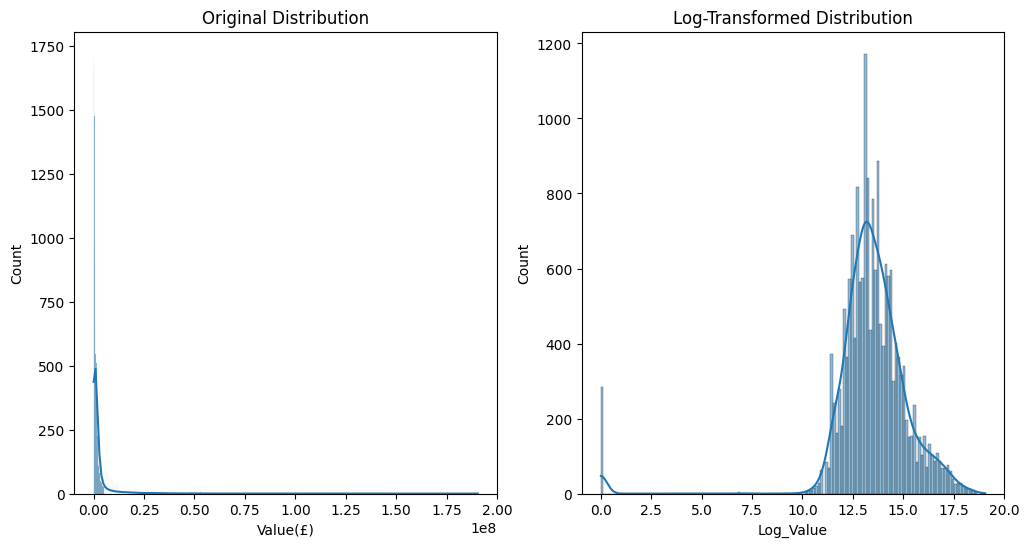

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Value(£)'], kde=True)
plt.title('Original Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['Log_Value'], kde=True)
plt.title('Log-Transformed Distribution')

plt.show()

+ **INTERPRETATION**

## **Step 4: Data Normalization/Scaling (if needed)**

+ **LOGIC**

In [48]:
from sklearn.preprocessing import StandardScaler
print("-----------BEFORE----------")
print(df.head())


# extract the features for normalization
features_to_normalize = ['Age', 'Overall', 'Value(£)', 'Log_Value', 'Age_Rating']

scaler = StandardScaler()

# normalize the selected features
df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])


print("\n-----------AFTER----------")
print(df.head())


-----------BEFORE----------
              Name  Age  Overall               Club   Value(£) Age_Group  \
0      L. Goretzka   27       87  FC Bayern München   91000000     26-30   
1  Bruno Fernandes   27       86  Manchester United   78500000     26-30   
2         M. Acuña   30       85         Sevilla FC   46500000     31-35   
3     K. De Bruyne   31       91    Manchester City  107500000     31-35   
4       N. Barella   25       86              Inter   89500000     26-30   

  Overall_Group  Log_Value  Age_Rating  
0         81-90  18.326370        2349  
1         81-90  18.178609        2322  
2         81-90  17.654963        2550  
3        91-100  18.493001        2821  
4         81-90  18.309749        2150  

-----------AFTER----------
              Name       Age   Overall               Club   Value(£)  \
0      L. Goretzka  0.834593  2.940553  FC Bayern München  11.256167   
1  Bruno Fernandes  0.834593  2.816114  Manchester United   9.661994   
2         M. Acuña  1.481

+ **INTERPRETATION**

## **Step 5: Save Preprocessed Data**

+ **LOGIC**

In [49]:
# specify dest path
output_path = 'preprocessed_data.csv'

# Save the preprocessed df in new csv file
df.to_csv(output_path, index=False)

print(f"Preprocessed data saved to: {output_path}")

df_processed = pd.read_csv("preprocessed_data.csv")
df_processed.head()

Preprocessed data saved to: preprocessed_data.csv


,Name,Age,Overall,Club,Value(£),Age_Group,Overall_Group,Log_Value,Age_Rating
0,L. Goretzka,0.834593,2.940553,FC Bayern München,11.256167,26-30,81-90,2.245328,1.938783
1,Bruno Fernandes,0.834593,2.816114,Manchester United,9.661994,26-30,81-90,2.177662,1.877999
2,M. Acuña,1.481188,2.691675,Sevilla FC,5.580910,31-35,81-90,1.937863,2.391289
3,K. De Bruyne,1.696720,3.438311,Manchester City,13.360476,31-35,91-100,2.321635,3.001384
4,N. Barella,0.403530,2.816114,Inter,11.064866,26-30,81-90,2.237716,1.490780


+ **INTERPRETATION**